In [1]:
from pystac import *
from shapely.geometry import Point, Polygon, mapping
import json
from datetime import datetime

In [2]:
item_id = 'AB0009e5_001_MUL_L1T'

In [3]:
p1 = Point(119.4688475506, 0.9092862133597)
p2 = Point(119.1757162387, -0.4953445709856)
p3 = Point(120.5066675928, -0.7638726131803)
p4 = Point(120.8004542068, 0.6399029422236)
p5 = Point(119.468847552, 0.9092862136569)

In [4]:
footprint = Polygon([p.x, p.y] for p in [p1, p2, p3, p4, p5])

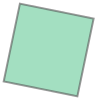

In [5]:
footprint

In [6]:
bbox = list(footprint.bounds)

bbox

[119.1757162387, -0.7638726131803, 120.8004542068, 0.9092862136569]

In [7]:
properties = {}

properties['datetime'] = '2020-03-14T01:27:20Z'
properties['start_datetime'] = '2020-03-14T01:27:20Z'
properties['end_datetime'] = '2020-03-14T01:27:20Z'
properties['platform'] = 'ALSAT-1B'
properties['instruments'] = ['ALITE']
properties['mission'] = 'ALSAT-1B'
properties['gsd'] = 24
properties['processing:level'] = 'L1T'
properties['proj:epsg'] = 'EPSG:32650'
#properties['view:incidence_angle'] =
properties['view:azimuth'] = -93.87859042310623
properties['view:sun_azimuth'] = 93.79403995855
properties['view:sun_elevation'] = 49.39520864449
#properties[''] = 
#properties[''] = 


In [8]:
item = Item(id=item_id, 
           geometry=mapping(footprint),
           bbox=bbox,
           datetime=datetime.strptime(properties['datetime'], '%Y-%m-%dT%H:%M:%SZ'),
           properties=properties,
           stac_extensions=['eo', 'sat', 'proj', 'view', 'processing'])

In [ ]:
from shapely.geometry import shape
shape(mapping(footprint))

In [9]:

# href, title=None, description=None, media_type=None, roles=None, properties=None
asset = Asset(href='./{}'.format('AB0009e5_001_MUL_L1T.tif'),
              media_type=MediaType.GEOTIFF,
              roles=['data'],
             properties={'scale': 0.2})

In [10]:
eo_bands = [extensions.eo.Band.create(name=b, 
                          common_name=b,
                          description=f'{b} radiance in W/m2/sr/m-6 (gain 0.2)') for b in ['blue', 'green', 'red', 'nir']]

eo_bands

[<Band name=blue>, <Band name=green>, <Band name=red>, <Band name=nir>]

In [11]:
eo_item = extensions.eo.EOItemExt(item)
eo_item.set_cloud_cover('0.0')
eo_item.set_bands(eo_bands, asset=asset)

eo_item.set_bands(eo_bands)
eo_item.apply(eo_bands) 

In [12]:
item.add_asset(key='data', asset=asset)

<Item id=AB0009e5_001_MUL_L1T>

In [13]:
item.add_asset(key='metadata', asset=Asset(href='./{}'.format('AB0009e5_001_MUL_L1T.dim'),
                                           media_type=MediaType.XML,
                                           roles=['metadata']))

<Item id=AB0009e5_001_MUL_L1T>

In [14]:
item.add_asset(key='overview', asset=Asset(href='./{}'.format('AB0009e5_001_MUL_L1T_browse.jpg'),
                                           media_type=MediaType.JPEG,
                                           roles=['overview']))

<Item id=AB0009e5_001_MUL_L1T>

In [15]:
item.href = './a'

In [16]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta.2',
 'id': 'AB0009e5_001_MUL_L1T',
 'properties': {'datetime': '2020-03-14T01:27:20Z',
  'start_datetime': '2020-03-14T01:27:20Z',
  'end_datetime': '2020-03-14T01:27:20Z',
  'platform': 'ALSAT-1B',
  'instruments': ['ALITE'],
  'mission': 'ALSAT-1B',
  'gsd': 24,
  'processing:level': 'L1T',
  'proj:epsg': 'EPSG:32650',
  'view:azimuth': -93.87859042310623,
  'view:sun_azimuth': 93.79403995855,
  'view:sun_elevation': 49.39520864449,
  'eo:cloud_cover': None,
  'eo:bands': [{'name': 'blue',
    'common_name': 'blue',
    'description': 'blue radiance in W/m2/sr/m-6 (gain 0.2)'},
   {'name': 'green',
    'common_name': 'green',
    'description': 'green radiance in W/m2/sr/m-6 (gain 0.2)'},
   {'name': 'red',
    'common_name': 'red',
    'description': 'red radiance in W/m2/sr/m-6 (gain 0.2)'},
   {'name': 'nir',
    'common_name': 'nir',
    'description': 'nir radiance in W/m2/sr/m-6 (gain 0.2)'}]},
 'geometry': {'type': 'Polygon',
  

In [17]:
write_file(item, include_self_link=True, dest_href=f'MetadataExtractorsTests_{item.id}.json')